In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy import stats

data=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\pseudo_facebook.csv")
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [245]:
#to check if there are any missing values
data.isnull().any() 

userid                   False
age                      False
dob_day                  False
dob_year                 False
dob_month                False
gender                    True
tenure                    True
friend_count             False
friendships_initiated    False
likes                    False
likes_received           False
mobile_likes             False
mobile_likes_received    False
www_likes                False
www_likes_received       False
dtype: bool

We have missing values in the columns of gender and tenure.In the upcoming analysis,we will sort out rows in the table in terms of
gender and/or tenure which would set to be a cluster index.Thefore any rows does contain null values in any of these columns,discarded in the initial step.



In [246]:
data=data.dropna()
data.isnull().any()

userid                   False
age                      False
dob_day                  False
dob_year                 False
dob_month                False
gender                   False
tenure                   False
friend_count             False
friendships_initiated    False
likes                    False
likes_received           False
mobile_likes             False
mobile_likes_received    False
www_likes                False
www_likes_received       False
dtype: bool

[optional] If you see that there are more than two catgeorical variables, to present the names of variable fllowed by its elements.
However,in this case we only have one categorical variable, gender. This step is not necessary at all. 



In [247]:
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


In [248]:
# Summanry of each filed in the data 
data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.882600e+04,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000
mean,1.597069e+06,37.212646,14.533109,1975.787354,6.284753,535.649758,196.374031,107.480056,156.111762,142.665432,106.147846,84.118835,49.963866,58.546557
std,3.440114e+05,22.524220,9.013865,22.524220,3.529431,454.258423,387.463475,188.861581,572.553504,1388.990063,445.494703,840.543366,285.751489,601.880496
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298868e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596225e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895572e+06,50.000000,22.000000,1993.000000,9.000000,673.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [249]:
labels=['13-19','20-34','35-49','50-65','over 65']
data['age_group']=pd.cut(data.age,bins=[13,20,35,50,65,122],labels=labels,include_lowest=True)
data.head()


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,13-19
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,13-19
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,13-19
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,13-19
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,13-19


## 2. data visiualization

### 2.1 Gender

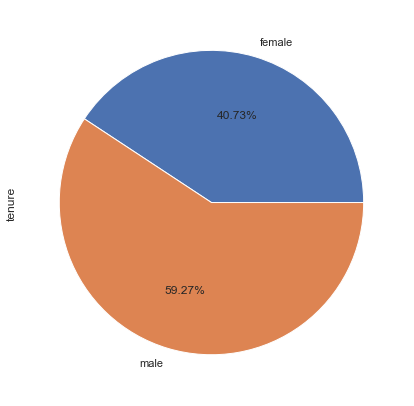

In [250]:
gender_no=data.groupby("gender")["tenure"].count()
fig,ax=plt.subplots(figsize=(13,7))
gender_no.plot.pie(ax=ax,autopct='%0.2f%%') #autopct cacluate the percentage value automatically


### 2.2 Age Distribution 

Text(0.5, 1.0, 'Age Distribution of Facebook Users')

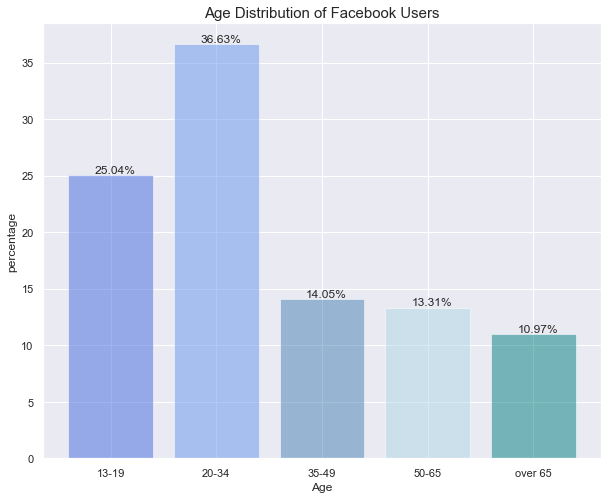

In [251]:
fig,ax=plt.subplots(figsize=(10,8))
test=data.groupby("age_group")['tenure'].count()
test=test/sum(test)*100
color=["royalblue","cornflowerblue","steelblue","lightblue","teal"]
ax.bar(test.index,test.values,color=color,alpha=0.5)
for i in ax.patches:
    ax.text(i.get_x()+0.25,i.get_height()+0.2,str(round(i.get_height(),2))+'%')
ax.set_xlabel("Age")
ax.set_ylabel("percentage")
ax.set_title("Age Distribution of Facebook Users",fontsize=15)

Text(0.5, 1.0, 'Age and Gender Distribution of Facebook Users')

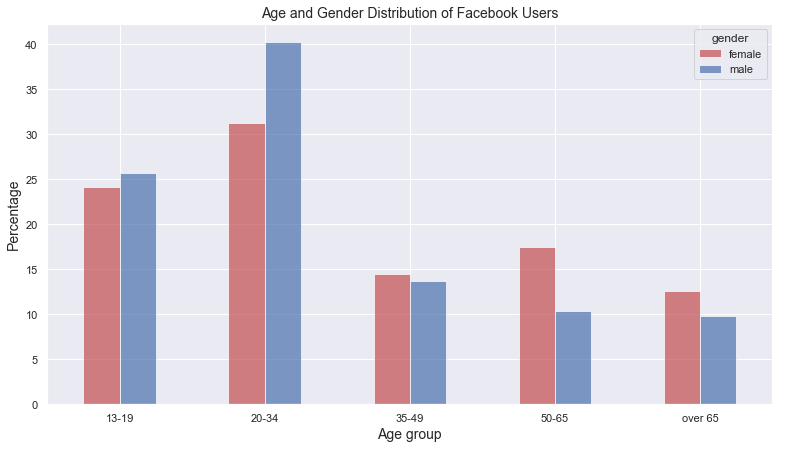

In [252]:
fig,ax=plt.subplots(figsize=(13,7))
color=['r','b']
test=data.pivot_table('tenure',index='age_group',columns='gender',aggfunc='count')
#conversion into percenatage

for col in test.columns:
    test[col]=test[col]/sum(test[col])*100
test.plot(kind='bar',color=color,ax=ax,alpha=0.7)
ax.set_xticklabels(test.index,rotation=360)
ax.set_xlabel("Age group",fontsize=14)
ax.set_ylabel("Percentage",fontsize=14)
ax.set_title('Age and Gender Distribution of Facebook Users',fontsize=14)

We can see that the majority of users are disproportionately aged between 20 and 34, accounting for 36% of the total users followed by teenagers comprising 25 %. The very next chart shows that the data is sorted out by gender and age_group. As with the previous result, the heavy users of the platform are still those between 20 and mid 30 with males reaching almost 40%. One interest thing catching our attention is that more than half of the usage rate in the group from 20 to mid 30  is the rate of the following group. This pronounced fall gives facebook a valuable lesson; come out with a aggressive marketing targeted at those over 35. 


### 2.3 Tenure

How logn our constomers will stay with us? Tis question is playing a determining role in doing businesss operation. So, let's prepare a line chart for consumer rentation rate across 8 intervals ;  the entire range of tenure will be divided into ten groups having an equal length of interval.


In [253]:
#conversion of tenure based on yearly basis
data["tenure_yearly"]=data["tenure"].apply(lambda x:x/365)

In [254]:
labels=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','over 6 years']
#Note that the maximum tenure_yearly is 8.6.Thefore we set the upper limit to 9.
data['tenure_group']=pd.cut(data["tenure_yearly"],bins=[0,1,2,3,4,5,6,9],labels=labels,include_lowest=True)
test=data.groupby("tenure_group")["tenure_yearly"].count()
test=test/test.sum()*100



Text(0.5, 1.0, 'Pie Chart: Retation Rate')

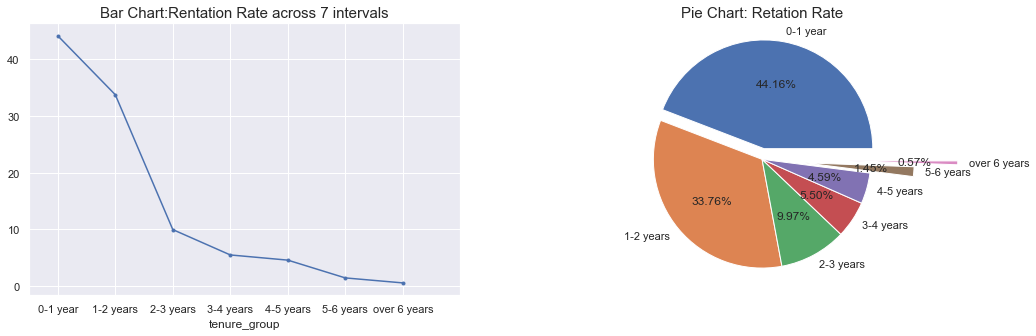

In [255]:
a=pd.Series([''])
b=pd.Series(np.unique(test.index))
c=pd.Series([''])
labels=pd.concat([a,b,c])
fig,axes=plt.subplots(1,2,figsize=(17,5))
test.plot(ax=axes[0],marker='.')
axes[0].set_xticks([-0.5,0,1,2,3,4,5,6,7])
axes[0].set_xticklabels(labels)
axes[0].set_title("Bar Chart:Rentation Rate across 7 intervals",fontsize=15)


#pie_charts
explode=[0.1,0.0,0.0,0.0,0.0,0.4,0.8]
test.plot.pie(ax=axes[1],autopct='%.2f%%',explode=explode)
axes[1].set_ylabel("")
axes[1].set_title("Pie Chart: Retation Rate",fontsize=15)

## commnets

A majority of retaining year is lying between 0 and 1 year after which there is a  fall by 10 % followed by a much steeper decrease. Around five years after users joined Facebook, almost all of them cease to use the service and look for rival flatform services. Facebook needs to take a thorough and detailed investigation to cope with a dramatic plunge  between  year 1 and year2

### 2.3.1  K-day Retained Date

Rentation rate is ofen a commonly used indicator to see how long customers are persistent to use the service of a firm after initla sign up. The rate itself i s another dimmension business managers take a closer look at to check if customer churn  occurs. if it does, it gives an alert to them to prevent further drop from happening. 

In terms of speed and strorage performance, SQL query is superior over pythonic code. 
### You shouold write SQL quries to get the result!!!!
#### method 1) SQL queries
```sql


WITH user_info_index AS(
       SELECT f.user_id,
              CAST(CONCAT(f.dob_year,'-',f.dob_month,'-',f.dob_day) AS DATE) AS register_date,
              MAX(CAST(CONCAT(f.dob_year,'-',f.dob_month,'-',f.dob_day) AS DATE)) OVER() AS latest_date,
              CAST(CONCAT(f.dob_year,'-',f.dob_month,'-',f.dob_day) AS DATE)+CONCAT(r.end_date,'day')::interval 
              AS consistent_date,
              f.tenure,
              r.index_name,
              r.init_date,
              r.end_date
              FROM facebooktbl AS f
                  CROSS JOIN (SELECT CONCAT(GENERATE_SERIES(30,720,30),' days repeated') AS index_name,
                                           GENERATE_SERIES(0,690,30) AS init_date,
                                           GENERATE_SERIES(30,720,30) AS end_date) AS r
                                           WHERE f.tenure IS NOT NULL)
        ,user_action_flag AS(
         SELECT user_id,
                register_date,
                index_name,
                SIGN(SUM(CASE WHEN consistent_date<=latest_date THEN
                              CASE WHEN tenure>init_date AND (tenure<end_date OR tenure>end_date) THEN 1 ELSE 0 END
                              END)) AS index_date_action
                FROM user_info_index
                GROUP BY user_id,register_date,index_name)
          SELECT index_name,
                 AVG(100*index_date_action) AS repeat_rate
                 FROM user_action_flag
                 GROUP BY index_name;

```



#### Method 2) python

In [256]:
'''
#creating the registered data colum from the year,day,month
import copy
from datetime import timedelta,datetime
test=data.copy()
test=test.dropna()

test['register_date']=test.apply(lambda x:str(x['dob_year'])+'-'+str(x['dob_month'])+'-'+str(x['dob_day']),axis=1)## we want to apply our function to each column,thereby seting axis to 1
test['register_date']=test.register_date.map(lambda x:datetime.strptime(x,'%Y-%m-%d')) # convesion of string to date format
test['latest_date']=test.apply(lambda x:x.register_date+timedelta(x.tenure),axis=1) #recording the latest date of each user


latest=max(test.latest_date) #find the date of a user who visited the platform most recenltly
 # No information is available beyond this date.So,we should our iteration up to this date
def check_out(x):
    date={'init':np.arange(0,720,30),'end':np.arange(30,750,30)} # we wan to see rentation rate on every 30 day
    total_number=np.zeros(24) # 720/30=24 we need 24 elements to store the total numbers of users staying with the company in each interval
    consistent_date=x.register_date
    for i,e in zip(date['init'],date['end']):
        index=0
        days=30
        while consistent_date<latest:
            if (x.tenure>i) and (x.tenure<e or x.tenure>e):
                consistent_date=consistent_date+timedelta(days=days)
                total_number[index]+=1
                index+=1
                days+=30
                break
    return total_number

outcome=test.apply(check_out,axis=1)/len(test.user_id)*100
'''

"\n#creating the registered data colum from the year,day,month\nimport copy\nfrom datetime import timedelta,datetime\ntest=data.copy()\ntest=test.dropna()\n\ntest['register_date']=test.apply(lambda x:str(x['dob_year'])+'-'+str(x['dob_month'])+'-'+str(x['dob_day']),axis=1)## we want to apply our function to each column,thereby seting axis to 1\ntest['register_date']=test.register_date.map(lambda x:datetime.strptime(x,'%Y-%m-%d')) # convesion of string to date format\ntest['latest_date']=test.apply(lambda x:x.register_date+timedelta(x.tenure),axis=1) #recording the latest date of each user\n\n\nlatest=max(test.latest_date) #find the date of a user who visited the platform most recenltly\n # No information is available beyond this date.So,we should our iteration up to this date\ndef check_out(x):\n    date={'init':np.arange(0,720,30),'end':np.arange(30,750,30)} # we wan to see rentation rate on every 30 day\n    total_number=np.zeros(24) # 720/30=24 we need 24 elements to store the total 

In [257]:
test=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\consistency.csv")
test=test.set_index('index_name')
days=np.arange(30,750,30) 
index=[str(i)+' days repeated' for i in days]
test=test.reindex(index)#rearrange the index from 30 days to 720 days
print(test)

                   repeat_rate
index_name                    
30 days repeated     99.836350
60 days repeated     96.556845
90 days repeated     93.610162
120 days repeated    90.738251
150 days repeated    87.707073
180 days repeated    84.436979
210 days repeated    80.904655
240 days repeated    77.177040
270 days repeated    73.196347
300 days repeated    69.017614
330 days repeated    64.713116
360 days repeated    60.598014
390 days repeated    56.830545
420 days repeated    53.039424
450 days repeated    49.166811
480 days repeated    45.519112
510 days repeated    42.200951
540 days repeated    39.051159
570 days repeated    36.161109
600 days repeated    33.405796
630 days repeated    30.964865
660 days repeated    28.619445
690 days repeated    26.509559
720 days repeated    24.726022


Text(0, 0.5, 'Repeated Days')

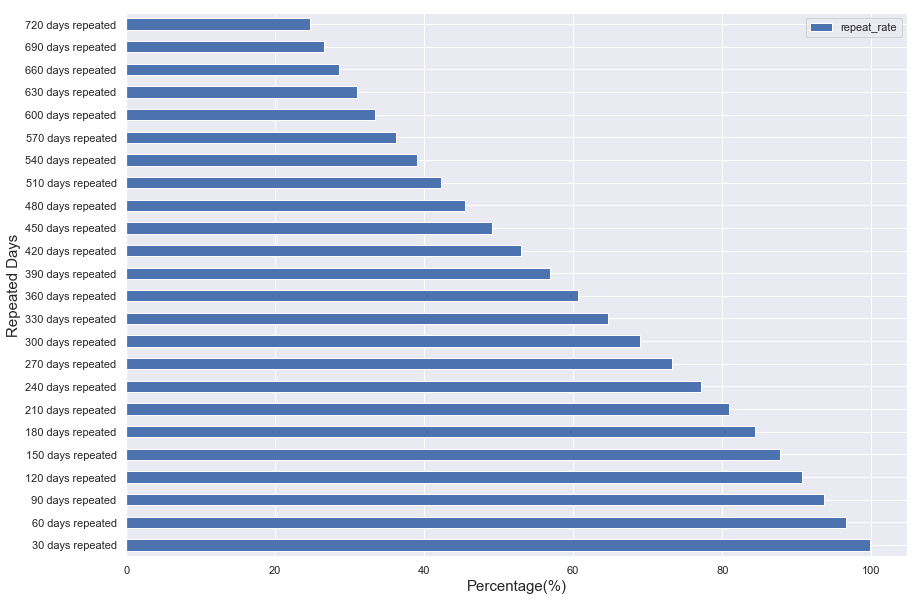

In [258]:
# draw a horizontal bar graph
fig,ax=plt.subplots(figsize=(14,10))
test.plot(kind="barh",ax=ax)
ax.set_xlabel("Percentage(%)",fontsize=15)
ax.set_ylabel("Repeated Days",fontsize=15)


### Comments
Almost all of the users revisit the site to perform various activities within 30 days after the initial sign up. However, the rate has worsened up to 50 % reduction approximately 420 days later. If facebook plans to build a revenue foundation that is predictable and sustainable, they should start tracking of customer sastisfactiion and the reason of higher coustomer churn. 

#https://www.forbes.com/sites/larrymyler/2016/06/08/acquiring-new-customers-is-important-but-retaining-them-accelerates-profitable-growth/#edf5f3e66711

### 2.3.2  Which groups keep using the service much longer?

#### 2.3.2.1 The difference between means of two gender groups 

According to a research report,'The Gender System and Interaction' by C: ridgeway, women values the face-fcae relationship than men. 
Threfore, While SNS greatly facilitate interaction between people and strengthen existing social ties, women stilll need to enjoy 
takling and sharing thier information with peers,thereby prefering facet-face interaction. This lead us to expect that it seems to be much harder for facebook compnay to retain them much longer than male usres. In addition,another reports says taht  the most popular way of interaciton women preref is a smartphone and they will receive and share more information about thier friends by words. Making a connetion online would undermine their statisfaction and loyalty, much harder for the company to stay conneceted with them. 
On the basis,we formulated the following hypothesis


H0: Female usres have the same average tenure  as male users do 

H1: The difference in means between two groups is not zero. 




##### _Step 1_ Drawing the boxplot for the comparison 


In [268]:
male=data.loc[data.gender=='male','tenure']
female=data.loc[data.gender=='female','tenure']
test=[male,female]



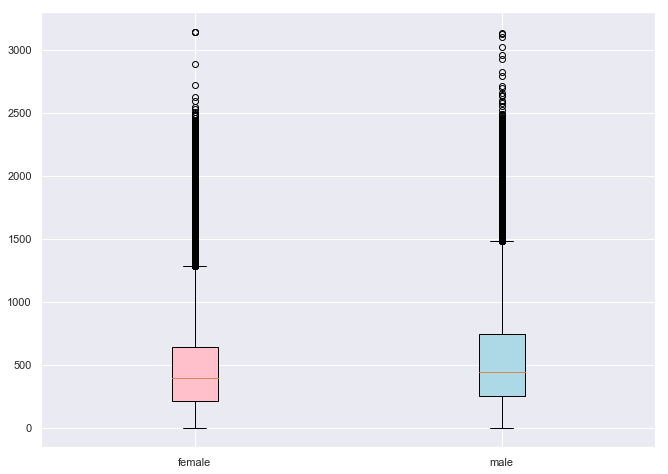

In [230]:
fig, ax = plt.subplots(figsize=(11,8))
labels=['female','male']
colors=['pink','lightblue']

bplot=ax.boxplot(test,labels=labels,patch_artist=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


As a standard rule, points are regarded as ouliers if they lie a fixed distance-usually 1.5 * IQR. However, bear in mind that this rule is applicable as long as the distriubtion is symmetric and approximate Gaussian. Highly asymmetric situations call for a 
outlier dection rule that treats upward and downard-outliers differently. For example, in our case of a strongly right skewed, flagging any point more than 1.5 IQR's above the upper quartile may be too liberal,decalring too many points to be upward-outliers
while flagging any points than 1.5 IQR's below the lower quartile may be too conservative ,declaring too few points to be downward-outerlier. 


#### step 2 Test for normality

Before taking the two-paired test, we need to take a normality test to determine whether sample data has  drawn from a normally distributed population. Without checking any normality assumption and proceeding the two-sample t-test, the test result would not be a reliable measure to reach a falsifying conclusion. 

1.shapiro test

2.kolmogorov-smirnov test

3.qq-plot



In [318]:
length=len(data.loc[data.gender=='female','gender'])
male=np.array(data.loc[data.gender=='male','tenure'].iloc[:length])#matching the length of index 
female=np.array(data.loc[data.gender=='female','tenure'])
diff=male-female


In [319]:
import plotly.figure_factory as ff
from scipy import stats


def result_matrix(x):
    result=[['Test_type','Test_static','Significance Level','p-value','Comment']]
    level=0.05
    
    alpha=0.05
    for i in range(2):
        if i==0:
            test='shapiro_test'
            test_static,p_value=stats.shapiro(x)
        else:
            test='Kolmogrove-sminorve test'
            test_static,p_value=stats.kstest(x,'norm')
        alpha=0.05
        if p_value>0.05:
            comment='Meeting normality condition'
        else:
            comment='Not meeting normality condition'
        result.append([test,test_static,alpha,p_value,comment])
    return result


table=ff.create_table(result_matrix(diff))
table.layout.height=200
table.layout.margin.update({'t':30,'b':50})
table.layout.update({'title':'Test For Normality Assumption'})
table.show()


C:\Users\DAVID SEO\anaconda\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.



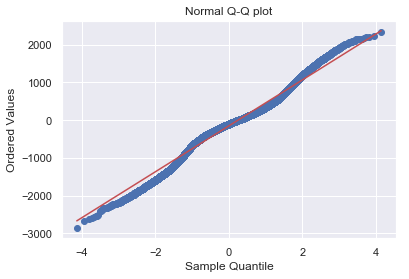

In [302]:
stats.probplot(diff,dist='norm',plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel("Sample Quantile")
plt.show()


### comment

None of the tests has rejected nulll hypotehsis at the significance level of 0.05,concludind that the residual is not following 
normal distriubtion. However, we have a conflicting result from qq plot.

Text(0.5, 1.0, 'Tenure Distribution of Female')

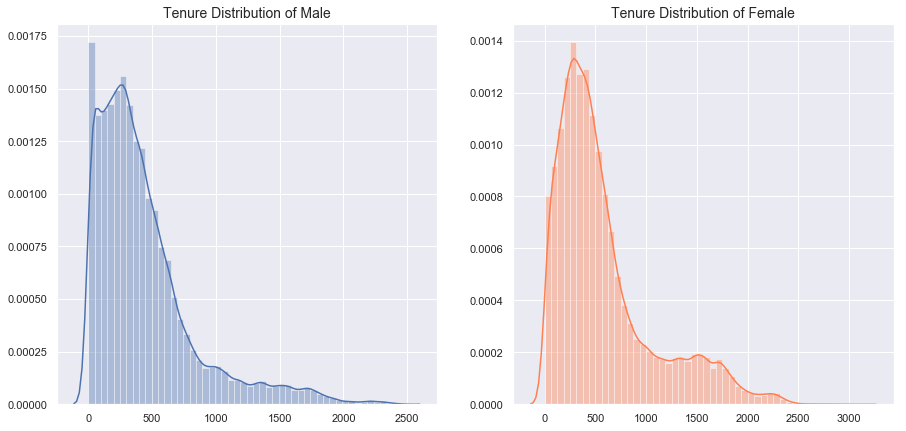

In [303]:
#kurtosis, skewness

def result_matrix(x):
    result=[['Test type','Statics','Significance level','P vlaue','Comment']]
    alpha=0.05
    for i in range(2):
        if i==0:
            test='skewness'
            statics,pvalue=stats.skewtest(x)
        else:
            test='kurtosis'
            statics,pvalue=stats.kurtosistest(x)
        if pvalue>alpha:
            comment='Fail to reject null hypoethesis'
        else:
            comment='Reject null hypothesis'
        result.append([test,statics,alpha,pvalue,comment])
    return result
table=ff.create_table(result_matrix(diff))
table.layout.height=200
table.layout.margin.update({'t':30,'b':50})
table.layout.update({'title':'Test For Kurtosis and Skewness'})
table.show()


#drawing the distribution
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.distplot(male,ax=ax[0])
ax[0].set_title('Tenure Distribution of Male',fontsize=14)
sns.distplot(female,ax=ax[1],color='coral')
ax[1].set_title('Tenure Distribution of Female',fontsize=14)



### step 3 Wilcoxon Signed-Rank Test

There exists an alternvative test which is commonly referred to as a non-parametric version of the paired T-test. 
The Wilcoxon signed rank test tests the null hypotesis that two related paired come from the same distriubtion.

In [317]:
result=[['Test','Statics','Significance','P value','Comment']]
statics,pvalue=stats.wilcoxon(male,female)
if pvalue>0.05:
    comment="Fail to reject Null"
else:
    comment='Reject Null'
result.append(['Wilcoxon Signed-Rank test',statics,0.05,pvalue,comment])
table=ff.create_table(result)
table.layout.height=200
table.layout.margin.update({'t':50,'b':30})
table.layout.update({'title':'Wilcoxon Signed-Test'})
table.show()

#### Comments:

We now conclude that there is a statistically significant difference in means of tenure between two gender groups. 